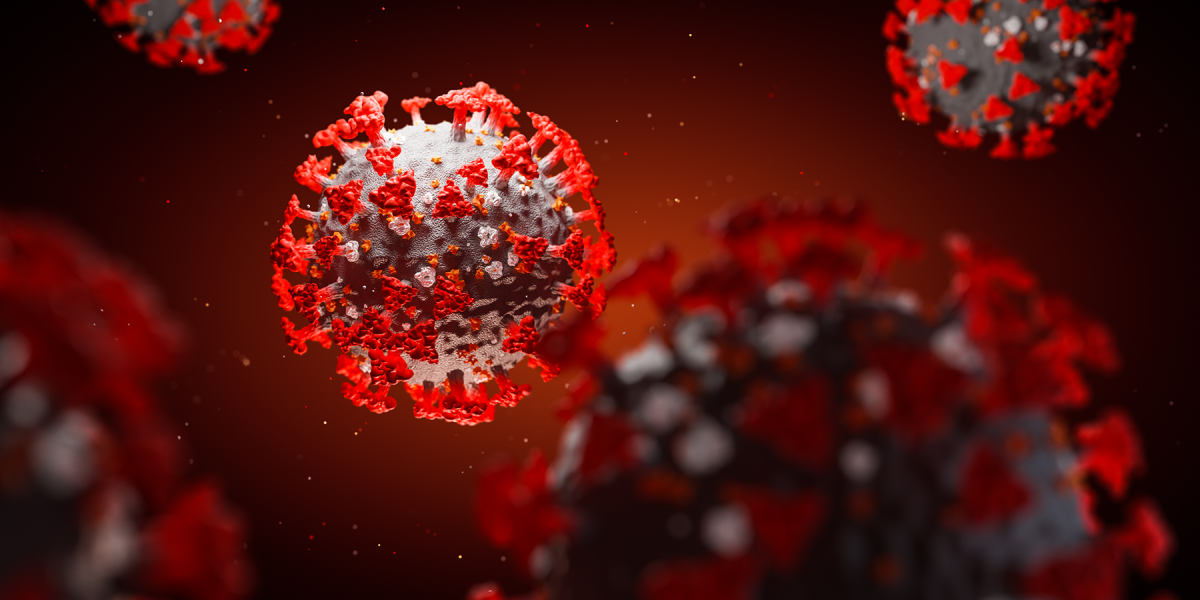

# Analysis of COVID-19 outbreak and vaccination

The unexpected outbreak of the new contagious disease called the novel coronavirus 2019 (nCoV-2019) has a great impact on the public health worldwide. World Health Organization renamed this deadly disease as COVID-19 on February 11, 2020 and it was declared as a pandemic on March 11, 2020. The virus has challenged the healthcare system globally even though vaccination has been introduced. Thus, there is a need to study how this deadly disease has spread across the world in a rapid phase. An interactive and visual representation is better for this purpose and thereby, creating awareness among the community against this disease.

In [1]:
from __future__ import print_function 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual 
from IPython.core.display import display, HTML

import pandas as pd
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
import squarify 

%matplotlib inline

In [2]:
#Data Collection
# Retrieving the LIVE COVID19 Stats updated by John Hopkins University in github
# Loading data right from the source:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
#Data Preparation
#confirmed.columns
confirmeddrop = confirmed.drop([ 'Lat', 'Long'], axis =1)
deathdrop = death.drop([ 'Lat', 'Long'], axis =1)
recovereddrop = recovered.drop([ 'Lat', 'Long'], axis =1)
#recovereddrop

In [4]:
confirmed_drop_cols = confirmeddrop.drop(['Province/State'],axis = 1)
death_drop_cols = deathdrop.drop(['Province/State'],axis = 1)
recovered_drop_cols = recovereddrop.drop(['Province/State'],axis = 1)
#recovered_drop_col

In [5]:
# Renaming
confirmed = confirmed.rename(columns={'Country/Region': 'Country'})
recovered = confirmed.rename(columns={'Country/Region': 'Country'})
death = death.rename(columns={'Country/Region': 'Country'})
country = country.rename(columns={'Country_Region': 'Country'})


In [6]:
confirmed_transform = confirmed_drop_cols.transpose()
death_transform = death_drop_cols.transpose()
recovered_transform = recovered_drop_cols.transpose()
#recovered_transform

In [7]:
confirmed_cases = pd.melt(confirmed_drop_cols, id_vars=["Country/Region"], var_name="Dates", value_name= "Confirmed Cases")
death_cases = pd.melt(death_drop_cols, id_vars=["Country/Region"], var_name="Dates", value_name= "Death Cases")
recovered_cases = pd.melt(recovered_drop_cols, id_vars=["Country/Region"], var_name="Dates", value_name= "Recovered Cases")
#confirmed_cases 

In [8]:
covid = pd.merge(confirmed_cases,death_cases)
covid = pd.merge(covid,recovered_cases)
covid['Active Cases'] = covid['Confirmed Cases']- (covid['Death Cases']+covid['Recovered Cases'])
covid['Death Rate (%)'] = (covid['Death Cases']/covid['Confirmed Cases'])*100
covid['Recovery Rate (%)'] = (covid['Recovered Cases']/covid['Confirmed Cases'])*100
#covid

# Total number of cases and number of countries affected

In [9]:
#Displaying total nurmber of confirmed, deaths, recovered and active cases
confirmed_total = int(country['Confirmed'].sum())
deaths_total = int(country['Deaths'].sum())
recovered_total = int(country['Recovered'].sum())
active_total = int(country['Active'].sum())
death_rate = (deaths_total/confirmed_total)*100
recovered_rate = (recovered_total/confirmed_total)*100
countries = country.Country.count()

print("Total number of Confirmed Cases : ", confirmed_total)
print("Total number of Death Cases : ", deaths_total)
print("Total number of Recovered Cases : ", recovered_total)
print("Total number of Active Cases : ", active_total)
print("World Death Rate : ", death_rate)
print("World Recovery Rate : ", recovered_rate)
print("Total number of Countries affected : ", countries)

Total number of Confirmed Cases :  155216499
Total number of Death Cases :  3242360
Total number of Recovered Cases :  91648644
Total number of Active Cases :  28346987
World Death Rate :  2.0889274148619985
World Recovery Rate :  59.045684312207044
Total number of Countries affected :  192


In [10]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [11]:
sorted_confirmed_country = country.sort_values('Confirmed', ascending = False) 
sorted_death_country = country.sort_values('Deaths', ascending = False) 
sorted_recovered_country = country.sort_values('Recovered', ascending = False)
sorted_active_country = country.sort_values('Active',ascending=False) 
sorted_country = pd.merge(sorted_confirmed_country,sorted_death_country)
sorted_country = pd.merge(sorted_country,sorted_recovered_country)
sorted_country = pd.merge(sorted_country,sorted_active_country)
sorted_country_drop = country.drop(['Last_Update','Lat', 'Long_', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],axis =1)
sorted_country_drop['Death Rate (%)'] = (sorted_country_drop['Deaths']/sorted_country_drop['Confirmed'])*100
sorted_country_drop['Recovery Rate (%)'] = (sorted_country_drop['Recovered']/sorted_country_drop['Confirmed'])*100
#sorted_country_drop

# Enter the number of countries for which you want the COVID-19 outbreak cases

In [12]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: blue'
    g = 'background-color: green'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country.sort_values('Confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# Slide to check the detailed information in each representation

# Bubble chart representation

In [13]:
# # plotting the worst affected countries

def bubble_chart(n):
    fig = px.scatter(sorted_country.head(n), x="Country", y="Confirmed", size="Confirmed", color="Country",
               hover_name="Country", size_max=70)
    fig.update_layout(
    title=str(n) +" Worst affected countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show()

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
#widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

# Choropleth map representation

In [14]:
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Confirmed', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Confirmed cases',)
fig.show()
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Deaths', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Deaths Reported')
fig.show()
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Recovered', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Recovered cases')
fig.show()
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Active', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Active cases')
fig.show()

# Bar chart representation

In [15]:
def bar_chart(n):
    fig = px.bar(
    sorted_country.head(n),
    x = "Country",
    y = "Confirmed",
    title= "Top "+ str(n) + " worst affected countries with highest number of confirmed cases", # the axis names
    color_discrete_sequence=["blue"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'

def bar_chart(n):
    fig = px.bar(
    sorted_death_country.head(n),
    x = "Country",
    y = "Deaths",
    title= "Top "+ str(n) + " worst affected countries with highest number of death cases", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'


def bar_chart(n):
    fig = px.bar(
    sorted_recovered_country.head(n),
    x = "Country",
    y = "Recovered",
    title= "Top "+ str(n) + " worst affected countries with highest number of recovered cases", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'

def bar_chart(n):
    fig = px.bar(
    sorted_active_country.head(n),
    x = "Country",
    y = "Active",
    title= "Top "+ str(n) + " countries with highest number of recovered cases", # the axis names
    color_discrete_sequence=["yellow"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

In [16]:
def horizontal_bar_chart(n):
    f, ax = plt.subplots(figsize=(10,10))
    c = sorted_confirmed_country.head(n)
    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Confirmed", y="Country", data = c, label="Confirmed", color="b")
    for i,(value,name) in enumerate(zip(c['Confirmed'],c['Country'])):
        plt.text(value,i-0.05,f'{value:,.0f}',size=10)
        plt.title(label='Top '+ str(n)+ ' countries with most no:of Confirmed cases')
        
plt.show()
interact(horizontal_bar_chart, n=10);


def horizontal_bar_chart(n):
    f, ax = plt.subplots(figsize=(10,10))
    c = sorted_death_country.head(n)
    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Deaths", y="Country", data = c, label="Confirmed", color="r")
    for i,(value,name) in enumerate(zip(c['Deaths'],c['Country'])):
        plt.text(value,i-0.05,f'{value:,.0f}',size=10)
        plt.title(label='Top '+ str(n)+ ' countries with most no:of Deaths reported')
        
plt.show()
interact(horizontal_bar_chart, n=10);


def horizontal_bar_chart(n):
    f, ax = plt.subplots(figsize=(10,10))
    c = sorted_recovered_country.head(n)
    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Recovered", y="Country", data = c, label="Recovered", color="g")
    for i,(value,name) in enumerate(zip(c['Recovered'],c['Country'])):
        plt.text(value,i-0.05,f'{value:,.0f}',size=10)
        plt.title(label='Top '+ str(n)+ ' countries with most no:of Recovered cases')
        
plt.show()
interact(horizontal_bar_chart, n=10);


def horizontal_bar_chart(n):
    f, ax = plt.subplots(figsize=(10,10))
    c = sorted_active_country.head(n)
    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Active", y="Country", data = c, label="Active", color="y")
    for i,(value,name) in enumerate(zip(c['Active'],c['Country'])):
        plt.text(value,i-0.05,f'{value:,.0f}',size=10)
        plt.title(label='Top '+ str(n)+ ' countries with most no:of Active cases')
        
plt.show()
interact(horizontal_bar_chart, n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

In [17]:
def compare_bar_chart(n):
    f, ax = plt.subplots(figsize=(10,10))

    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Confirmed", y="Country", data = sorted_country.head(n), label="Confirmed", color="b")

    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Deaths", y="Country", data = sorted_country.head(n), label="Deaths", color="r")

    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Recovered", y="Country", data = sorted_country.head(n), label="Recovered", color="g")

    sb.set_color_codes(palette = 'bright')
    sb.barplot(x="Active", y="Country", data = sorted_country.head(n), label="Active", color="y")
    plt.title(label='Comparative case analysis of the top '+ str(n) +' countries with most no:of cases')
    plt.legend(loc='lower right')
plt.show()
interact(compare_bar_chart, n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

## Treemap view

In [18]:
def treemap(n):
    ca = sorted_confirmed_country.head(n).groupby('Country')[['Confirmed']].sum().index.get_level_values(0).tolist()
    cd = sorted_confirmed_country.head(n).groupby('Country')[['Confirmed']].sum().reset_index().Confirmed.values.tolist()
    color=['purple','cyan','limegreen','crimson','slateblue','mistyrose','violet','yellow','red','goldenrod','cyan','darkcyan','deeppink','blue']
    squarify.plot(sizes=cd,label=ca, color=color,alpha=0.7 )
    plt.title("Top " + str(n) + " Countries with most number of Confirmed cases",fontsize=16)
    plt.axis('off')
    fig1 = plt.gcf();
    fig1.set_size_inches(15,10)
    fig1.show();
interact(treemap,n=10);

def treemap(n):
    da = sorted_death_country.head(n).groupby('Country')[['Deaths']].sum().index.get_level_values(0).tolist()
    dd = sorted_death_country.head(n).groupby('Country')[['Deaths']].sum().reset_index().Deaths.values.tolist()
    color=['purple','cyan','goldenrod','limegreen','mistyrose','crimson','slateblue','violet','yellow','cyan','green','red','darkcyan','deeppink','blue']
    squarify.plot(sizes=dd,label=da, color=color,alpha=0.7 )
    plt.title("Top " + str(n) + " Countries with most number of Deaths reported",fontsize=16)
    plt.axis('off')
    fig2 = plt.gcf();
    fig2.set_size_inches(15,10)
    fig2.show();
interact(treemap,n=10);

def treemap(n):
    ra = sorted_recovered_country.head(n).groupby('Country')[['Recovered']].sum().index.get_level_values(0).tolist()
    rd = sorted_recovered_country.head(n).groupby('Country')[['Recovered']].sum().reset_index().Recovered.values.tolist()
    color=['purple','cyan','goldenrod','limegreen','slateblue','violet','cyan','yellow','red','green','deeppink','blue','darkcyan']
    squarify.plot(sizes=rd,label=ra, color=color,alpha=0.7 )
    plt.title("Top " + str(n) + " Countries with most number of Recovered cases",fontsize=16)
    plt.axis('off')
    fig3 = plt.gcf();
    fig3.set_size_inches(15,10)
    fig3.show();
interact(treemap,n=10);

def treemap(n):
    aa = sorted_active_country.head(n).groupby('Country')[['Active']].sum().index.get_level_values(0).tolist()
    ad = sorted_active_country.head(n).groupby('Country')[['Active']].sum().reset_index().Active.values.tolist()
    color=['purple','cyan','goldenrod','limegreen','slateblue','red','green','cyan','yellow','deeppink','violet','blue','darkcyan']
    squarify.plot(sizes=ad,label=aa, color=color,alpha=0.7 )
    plt.title("Top " + str(n) + " Countries with most number of Active cases",fontsize=16)
    plt.axis('off')
    fig4 = plt.gcf();
    fig4.set_size_inches(15,10)
    fig4.show();
interact(treemap,n=10);


interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

# Box plot representation
Box plot is a type of chart that shows the distribution of a numerical data and its skewness by displaying the quartile (or percentile) values of data and average values.

In [19]:
sorted_country_drop = sorted_country_drop.drop(['Death Rate (%)','Recovery Rate (%)'],axis =1)

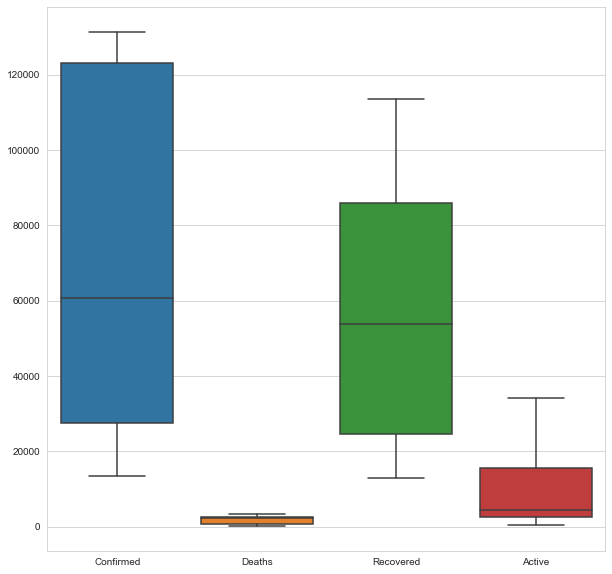

In [20]:
sb.set_style('whitegrid')
plt.figure(figsize=(10,10))
sb.boxplot(data = sorted_country_drop.head())
plt.show()

# Heat map representation
Heat map is a data visualization technique that shows the magnitude of a phenomenon as colour in two-dimension. It shows the correlation between two statistical variables. 

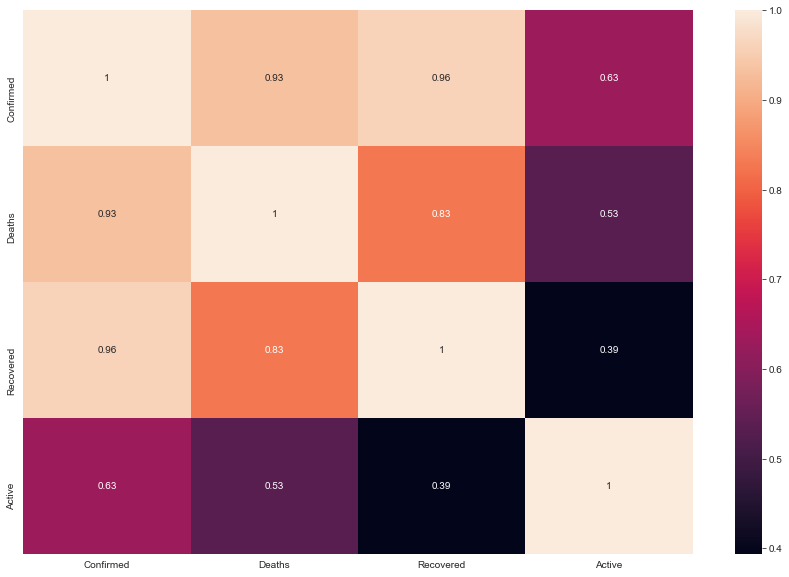

In [21]:
plt.figure(figsize=(15,10))
sb.heatmap(sorted_country_drop.corr(), annot=True)

plt.show()

# Pie Chart representation

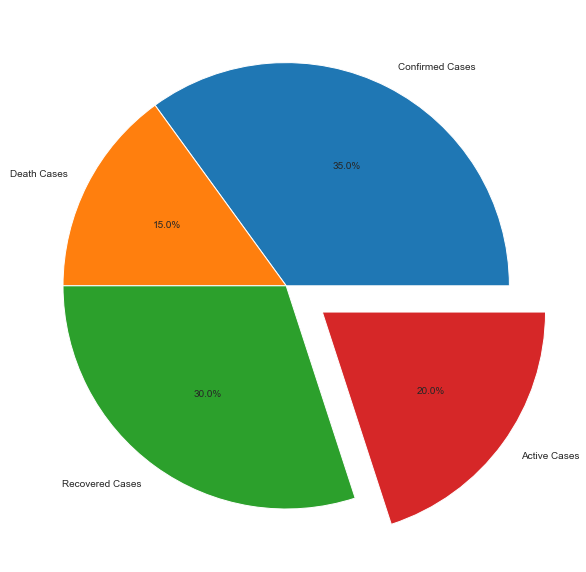

In [22]:
slices=[7,3,6,4]
cases = ['Confirmed Cases','Death Cases','Recovered Cases','Active Cases']
plt.figure(figsize=(10,12))
plt.pie(slices,labels = cases,explode = (0,0,0,0.2), autopct ='%1.1f%%')
plt.show()


In [23]:
def pie_chart(n):
    fig = px.pie(sorted_confirmed_country.head(n), values='Confirmed', names='Country',
             title='Confirmed cases (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

def pie_chart(n):
    fig = px.pie(sorted_death_country.head(n), values='Deaths', names='Country',
             title='Deaths reported (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

def pie_chart(n):
    fig = px.pie(sorted_recovered_country.head(n), values='Recovered', names='Country',
             title='Recovered cases (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

def pie_chart(n):
    fig = px.pie(sorted_active_country.head(n), values='Active', names='Country',
             title='Active cases (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

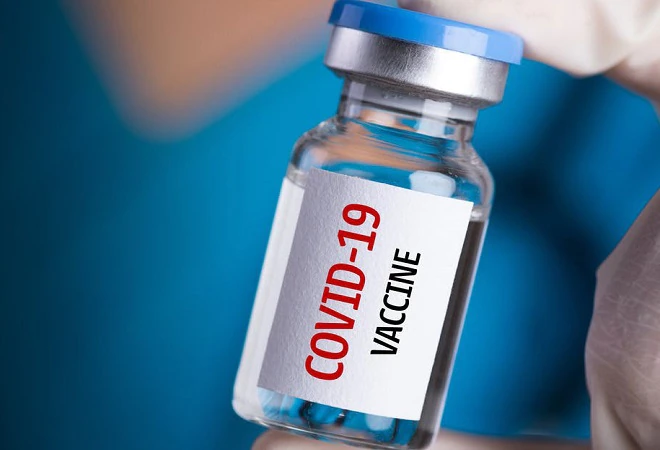

A COVID‐19 vaccine is a vaccine intended to provide acquired immunity against severe acute respiratory syndrome coronavirus 2 (SARS‐CoV‐2), which is the virus causing coronavirus disease 2019 (COVID‐19). We can have a quick analysis of the vaccination details like which are the vaccines administered in each country, how many daily vaccinations occurs, the total number of vaccinations in each country, etc.

In [24]:
covid_vacc = pd.read_csv('https://raw.githubusercontent.com/LakshmiAnush/covid-visualization/main/country_vaccinations.csv')
covid_vacc.columns;

In [25]:
covid_vacc;

In [26]:
#Dropping irrelevant fields like "source name" and "source website"
covid_vacc.drop(['source_name', 'source_website'], axis = 1, inplace = True)

In [27]:
#Removing null values from the dataset
covid_vacc.isnull().sum(axis = 0 );

In [28]:
#To find the unique countries where vaccines are given
vacc_countries = covid_vacc['country'].unique()
vacc_countries;

# Analysing the various vaccines administered in each country

## Total number of vaccinations administered

In [29]:
total_vacc = covid_vacc.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [30]:
total_vacc_world = int(covid_vacc['total_vaccinations'].sum())
total_full_vacc = int(covid_vacc['people_fully_vaccinated'].sum())

In [31]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Total Vaccinations: "  + str(total_vacc_world) +"</span>" +
             "<br />"+
             "<span style='color: #fff; font-size:30px;'> Total no:of people fully vaccinated: " + str(total_full_vacc) + "</span>"+
             "</div>")
       )

## Countries along with vaccines available in each country

In [32]:
#Analysing the various vaccines applied in each country
d = {}
for i in covid_vacc.values:
    d[i[0]] = d.get(i[0], [])
    if i[12] not in d[i[0]]:
        d[i[0]].append(i[12])
for i, j in d.items():
    print(i, " : ", j)

Afghanistan  :  ['Oxford/AstraZeneca']
Albania  :  ['Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V']
Algeria  :  ['Sputnik V']
Andorra  :  ['Oxford/AstraZeneca, Pfizer/BioNTech']
Angola  :  ['Oxford/AstraZeneca']
Anguilla  :  ['Oxford/AstraZeneca']
Antigua and Barbuda  :  ['Oxford/AstraZeneca']
Argentina  :  ['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']
Armenia  :  ['Sputnik V']
Aruba  :  ['Pfizer/BioNTech']
Australia  :  ['Oxford/AstraZeneca, Pfizer/BioNTech']
Austria  :  ['Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']
Azerbaijan  :  ['Sinovac']
Bahamas  :  ['Oxford/AstraZeneca']
Bahrain  :  ['Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V']
Bangladesh  :  ['Oxford/AstraZeneca']
Barbados  :  ['Oxford/AstraZeneca']
Belarus  :  ['Sputnik V']
Belgium  :  ['Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']
Belize  :  ['Oxford/AstraZeneca']
Bermuda  :  ['Pfizer/BioNTech']
Bhutan  :  ['Oxford/AstraZeneca']
Bolivia  :  ['Oxf

## Vaccines along with the countires in which they are administered

In [33]:
vaccines = total_vacc.vaccines.unique()
for v in vaccines:
    countries = total_vacc.loc[total_vacc.vaccines==v, 'country'].values
    print(f"Vaccines: {v} are used in \nCountries: {list(countries)}\n")

Vaccines: Oxford/AstraZeneca are used in 
Countries: ['Afghanistan', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Bhutan', 'Botswana', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Djibouti', 'Dominica', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guyana', 'Jamaica', 'Kosovo', 'Lesotho', 'Malawi', 'Mali', 'Mauritius', 'Moldova', 'Montserrat', 'Myanmar', 'Nauru', 'Nigeria', 'Papua New Guinea', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Sierra Leone', 'Solomon Islands', 'South Sudan', 'Sudan', 'Suriname', 'Taiwan', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Uganda', 'Uzbekistan', 'Vietnam', 'Zambia']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V are used in 
Countries: ['Albania', 'Bosnia and Herzegovina']

Vaccines: Sputnik V are used in 
Countries: ['A

## Displaying top countries in the descending order based on their total no:of vaccinations administered

In [34]:
# Top n countries with total vaccinations
def top_countries(n):
    top_n_countries = total_vacc[['country','vaccines','daily_vaccinations','total_vaccinations','people_fully_vaccinated']].sort_values('total_vaccinations', ascending=False).reset_index(drop=True).head(n)
    pd.set_option('display.max_colwidth', 85)
    display(top_n_countries)
interact(top_countries,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

## Displaying top countries in the descending order based on their total no:of vaccinations administered

In [35]:
#Vaccines given on 02-05-2021
recent_date=covid_vacc[covid_vacc['date']=='02-05-2021']
vacc_ordered=recent_date['vaccines'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
#print(vacc_ordered)

In [36]:
# Total vaccinations per 100 people by country
total_vacc_100=covid_vacc[covid_vacc['date']=='02-05-2021'].groupby(['country','vaccines'])['total_vaccinations_per_hundred'].sum().reset_index()

In [37]:
def vacc_100(n):
    # Total vaccinations per 100 people by country
    total_vacc_100=covid_vacc[covid_vacc['date']=='02-05-2021'].groupby(['country','vaccines'])['total_vaccinations_per_hundred'].sum().reset_index()
    # Top n countries by total vaccinations per 100 people
    total_vacc_100=total_vacc_100.sort_values(by='total_vaccinations_per_hundred', ascending=False).reset_index(drop=True).head(n)

    pd.set_option('display.max_colwidth', 80)
    display(total_vacc_100)
interact(vacc_100,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

## Displaying top countries in the descending order based on the number of fully vaccinated people

In [38]:
# Total no:of people fully vaccinated
total_fully_vaccinated=covid_vacc[covid_vacc['date']=='02-05-2021'].groupby(['country','vaccines'])['people_fully_vaccinated'].sum().reset_index()

In [39]:
def full_vacc(n):
    # Total no:of people fully vaccinated
    total_fully_vaccinated=covid_vacc[covid_vacc['date']=='02-05-2021'].groupby(['country','vaccines'])['people_fully_vaccinated'].sum().reset_index()
    # Top n countries by total vaccinations per 100 people
    total_full_vacc=total_fully_vaccinated.sort_values(by='people_fully_vaccinated', ascending=False).reset_index(drop=True).head(n)

    pd.set_option('display.max_colwidth', 80)
    display(total_full_vacc)
interact(full_vacc,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

In [40]:
vaccine_data = covid_vacc[['country','vaccines']]
vaccine_data;

d = vaccine_data.groupby(['country','vaccines']).count().reset_index()
d;

d[['Vaccine1','Vaccine2','Vaccine3','Vaccine4','Vaccine5']] = d['vaccines'].str.split(',',expand = True)
d;

d = d.drop(columns = ['vaccines'], axis = 1)
d;

d1 = d[['country','Vaccine1']]
d1 = d1.rename(columns = {'Vaccine1':'vaccines'})
d1;

d2 = d[['country','Vaccine2']]
d2 = d2.rename(columns = {'Vaccine2':'vaccines'})
d2;

d3 = d[['country','Vaccine3']]
d3 = d3.rename(columns = {'Vaccine3':'vaccines'})
d3;

d4 = d[['country','Vaccine4']]
d4 = d.rename(columns = {'Vaccine4':'vaccines'})
d4;

d5 = d[['country','Vaccine5']]
d5 = d5.rename(columns = {'Vaccine5':'vaccines'})
d5;

In [41]:
vacc_data_new = pd.concat([d1,d2,d3,d5], ignore_index = True)
vacc_data_new;

## Table displaying the top vaccines along with the number of countries where they are administered

In [42]:
#Top vaccines given along with the number of countries in which they are given
top_vacc = d1.groupby(['vaccines']).count().nlargest(10,'country').reset_index()
top_vacc

vaccines  country
0  Oxford/AstraZeneca      102
1             Moderna       31
2     Pfizer/BioNTech       24
3   Sinopharm/Beijing       13
4     Johnson&Johnson       12
5           Sputnik V        8
6             CanSino        2
7             Covaxin        1
8        EpiVacCorona        1
9             Sinovac        1

# Bar chart representation

## Displays vaccines that are widely used

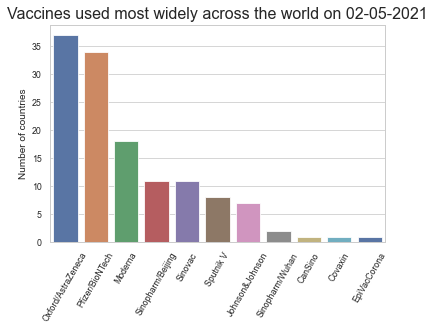

In [43]:
# Plot context, style and subplot
sb.set_style("whitegrid")
sb.set_context('paper')
f, ax = plt.subplots(1, 1)
# Seaborn bar plot customization
sb.barplot(x=vacc_ordered.index, y=vacc_ordered, palette='deep')
ax.set_title("Vaccines used most widely across the world on 02-05-2021", fontsize=16)
ax.set_ylabel('Number of countries', fontsize=10)

plt.xticks(rotation=60)
plt.show()

## Displays top countries with total vaccinations per 100 people

In [44]:
# Top 50 countries by total vaccinations per 100 people
total_vacc_100=total_vacc_100.sort_values(by='total_vaccinations_per_hundred', ascending=False).reset_index(drop=True).head(50)

In [45]:
def bar_chart(n):
    # Seaborn Bar plot and customization
    sb.set_style("whitegrid")
    sb.set_context('paper')
    f, ax = plt.subplots(1, 1)

    ax=sb.barplot(y='country',x='total_vaccinations_per_hundred',data=total_vacc_100.head(n),palette='viridis')
    ax.set_xlabel('Doses per 100 people')
    ax.set_ylabel('Countries')
    ax.set_title('Top '+ str(n)+' countries by total vaccinations per 100 people', fontsize=12)

    # Ensures that all data is displayed and saves the plot into a png file
    plt.tight_layout()
    fig = plt.gcf();
    fig.set_size_inches(15,10)
    fig.show();
interact(bar_chart,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

## Displays top countries with fully vaccinated people

In [46]:
total_full_vacc=total_fully_vaccinated.sort_values(by='people_fully_vaccinated', ascending=False).reset_index(drop=True).head(50)

In [47]:
def bar_chart(n):
    # Seaborn Bar plot and customization
    sb.set_style("whitegrid")
    sb.set_context('paper')
    f, ax = plt.subplots(1, 1)

    ax=sb.barplot(y='country',x='people_fully_vaccinated',data=total_full_vacc.head(n),palette='viridis')
    ax.set_xlabel('People fully vaccinated')
    ax.set_ylabel('Countries')
    ax.set_title('Top '+ str(n)+' countries with fully vaccinated people', fontsize=12)

    # Ensures that all data is displayed and saves the plot into a png file
    plt.tight_layout()
    fig = plt.gcf();
    fig.set_size_inches(15,10)
    fig.show();
interact(bar_chart,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

## Pie chart displaying the top 10 vaccines along with the number of countries where they are administered

In [48]:
fig = px.pie(top_vacc, values='country', names='vaccines',
             title='Most widely used vaccines across the world',
              hover_data=['country'], labels={'country':'No:of countries in which they are given'})
fig.update_traces(textposition='inside')
fig.show()


## Choropleth map showing the countries along with vaccines administered in it

In [49]:
fig = px.choropleth(covid_vacc, locations = 'country', locationmode = 'country names', color = 'vaccines', animation_frame = 'date')
fig.update_layout(title_text = 'Countries with Vaccinations given',)
fig.show()

In [50]:
fig = px.choropleth(locations=total_vacc['country'], 
                    locationmode="country names",
                    color=total_vacc['vaccines'],
                    title="Countries shown with different colors in each case of vaccination administered",
                    height = 800
                   )
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccines administered'})
fig.show()

## Tree map representation

In [55]:
fig = px.treemap(total_vacc, path = ['vaccines', 'country'], values = 'daily_vaccinations',
                title="Daily vaccinations per country, grouped by vaccine administered")
fig.show()

fig = px.treemap(total_vacc, path = ['vaccines', 'country'], values = 'total_vaccinations',
                title="Total vaccinations per country, grouped by vaccine scheme")
fig.show()

fig = px.treemap(total_vacc, path = ['vaccines', 'country'], values = 'people_fully_vaccinated',
                title="Number of people fully vaccinated per country, grouped by vaccine administered")
fig.show()

## Heatmap displaying the relationship between statistical variables

In [52]:
check_data = covid_vacc.drop(covid_vacc[covid_vacc.people_vaccinated.isna()].index)

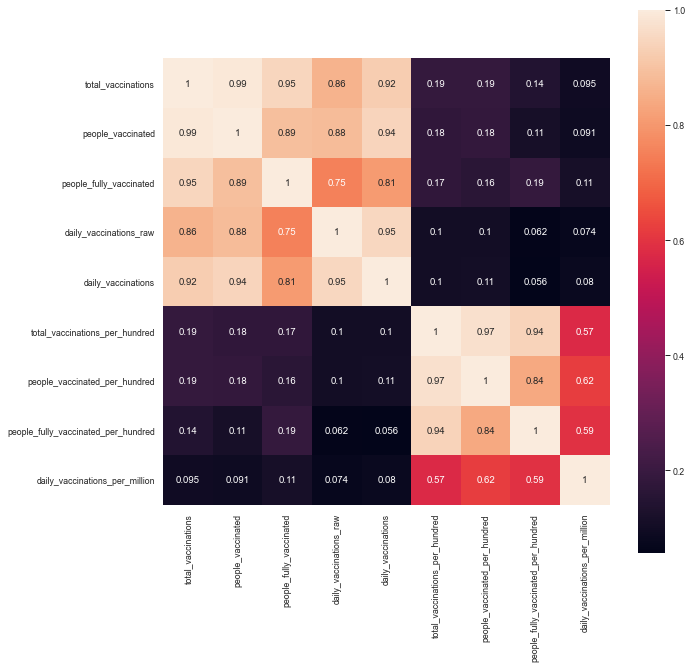

In [53]:
plt.subplots(figsize=(10, 10))
sb.heatmap(check_data.corr(), annot=True, square=True)
plt.show()